<a href="https://colab.research.google.com/github/19mddill/ML_Aurelien/blob/main/classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:

from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

# alt

In [ ]:
# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# X = x_train.reshape(-1, 28*28).astype('float32') / 255
# y = x_test.reshape(-1, 28*28).astype('float32') / 255


In [ ]:
# x_train.shape


In [ ]:
# x_test.shape

In [ ]:
# x_train

In [ ]:
# x_train[0]

In [ ]:
# import matplotlib.pyplot as plt

# def plot_digit(image_data):
#     image = image_data.reshape(28, 28)
#     plt.imshow(image, cmap='binary')
#     plt.axis('off')

# some_digit = x_train[10321]
# plot_digit(some_digit)
# plt.show()

In [ ]:
# y_train[10321]

In [ ]:
# from tensorflow.keras.datasets import mnist
# (x_train_raw, _), _ = mnist.load_data()
# print(x_train_raw[0])


In [ ]:
# plot_digit(x_train_raw[0])
# plt.show()

In [ ]:
# # extra code – this cell generates and saves Figure 3–2
# plt.figure(figsize=(9, 9))
# for idx, image_data in enumerate(x_train[:100]):
#     plt.subplot(10, 10, idx + 1)
#     plot_digit(image_data)
# plt.subplots_adjust(wspace=0, hspace=0)
# save_fig("more_digits_plot", tight_layout=False)
# plt.show()

# alt


In [ ]:
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X,y = mnist.data, mnist.target

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

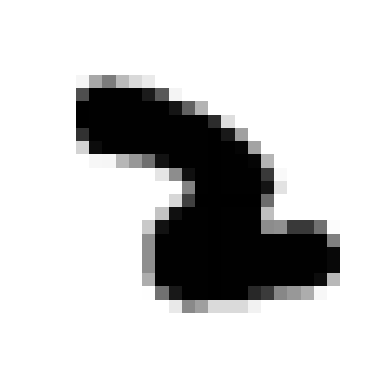

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

some_digit = X[10321]
plot_digit(some_digit)
plt.show()

In [ ]:
# y[10321]

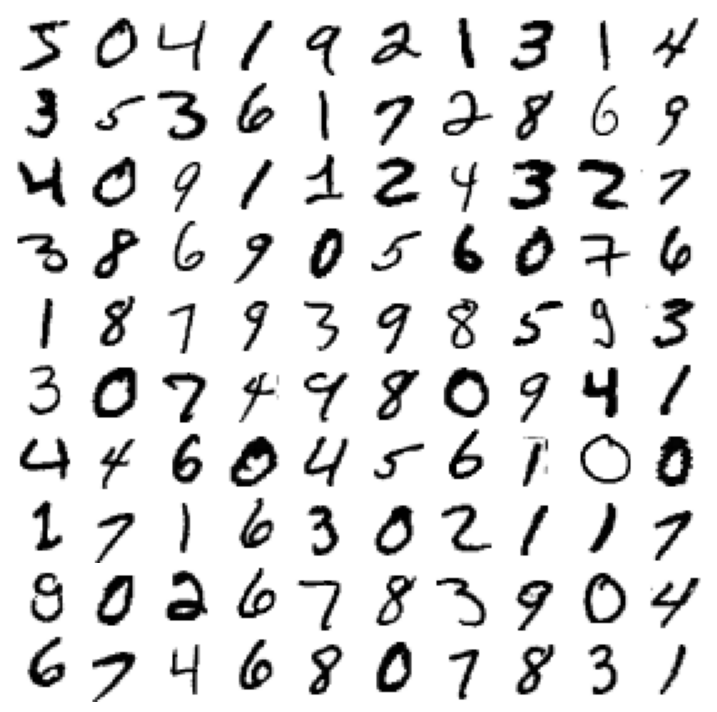

In [ ]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


# Binary Classifer( The 5 detector )

In [ ]:
y_train_5 = (y_train == '5')

In [ ]:
y_train[:20],y_train_5

(array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
        '6', '1', '7', '2', '8', '6', '9'], dtype=object),
 array([ True, False, False, ...,  True, False, False]))

In [ ]:
y_train_5[:20]

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False])

In [ ]:
y_test[:30]

array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0',
       '7', '4', '0', '1'], dtype=object)

In [ ]:
y_test_5 = (y_test == '5')

In [ ]:
y_test_5[:30]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [ ]:
X_train,y_train_5

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([ True, False, False, ...,  True, False, False]))

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([X_train[11]])

array([ True])

In [ ]:
sgd_clf.predict([X_train[12]])

array([False])

In [ ]:
print("Prediction:", sgd_clf.predict([X_test[15]]))
print("Actual:", y_test_5[15])

Prediction: [ True]
Actual: True


In [ ]:
  from sklearn.model_selection import cross_val_score

  cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')

In [ ]:
dummy_clf.fit(X_train,y_train_5)

DummyClassifier(strategy='most_frequent')

In [ ]:
print(any(dummy_clf.predict(X_train)))

False


In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


for train_index, test_index in StratifiedKFold(n_splits=3).split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print(y_pred)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

[ True False False ...  True False  True]
0.95035
[False False False ...  True False False]
0.96035
[False False False ...  True False False]
0.9604


In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)

In [ ]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect = y_train_5


In [ ]:
confusion_matrix(y_train_5,y_train_perfect)

array([[54579,     0],
       [    0,  5421]])

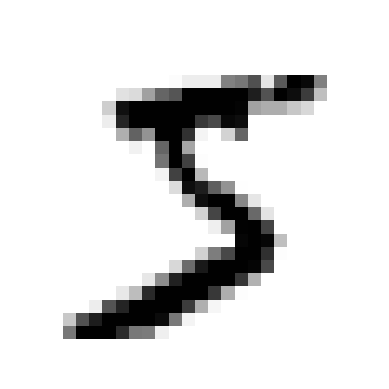

In [ ]:
some_digit = X[0]
plot_digit(some_digit)

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])


In [ ]:
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
# so raising the threshold decreases the Recall

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")


In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

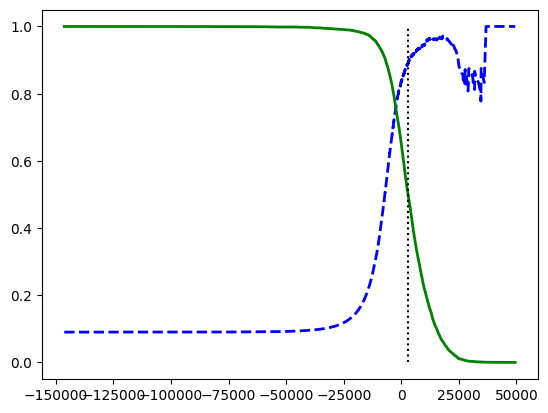

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

In [ ]:
precisions,recalls,thresholds


(array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]),
 array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
          38871.26391927,   42216.05562787,   49441.43765905]))

In [ ]:
idx_90_precision = (precisions >= 0.90).argmax()

In [ ]:
thresholds[idx_90_precision]

np.float64(3370.0194991439557)

In [ ]:
precisions == 0.90

array([False, False, False, ..., False, False, False])

In [ ]:
threshold_for_90_precision = thresholds[idx_90_precision]

In [ ]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [ ]:
from sklearn.metrics import precision_score, recall_score


precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5,y_train_pred_90)

0.4799852425751706

Text(0, 0.5, 'Precision')

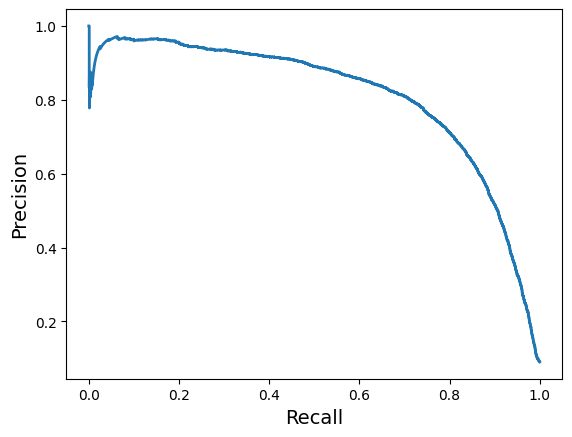

In [ ]:
plt.plot(recalls, precisions,linewidth=2,label="Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]
tpr_90,fpr_90

(np.float64(0.4799852425751706), np.float64(0.005295076861063779))

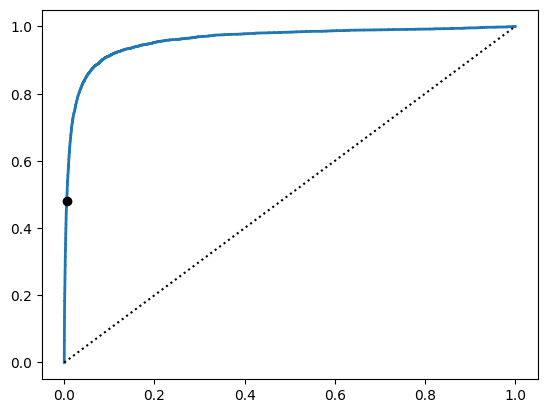

In [ ]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:,1]

In [ ]:
precisions_forest,recalls_forest,thresholds_forest = precision_recall_curve(y_train_5,y_scores_forest)

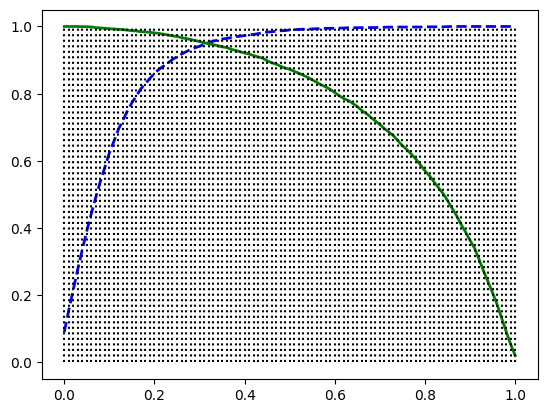

In [ ]:
plt.plot(thresholds_forest, precisions_forest[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_forest, recalls_forest[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds_forest, 0, 1.0, "k", "dotted", label="threshold")

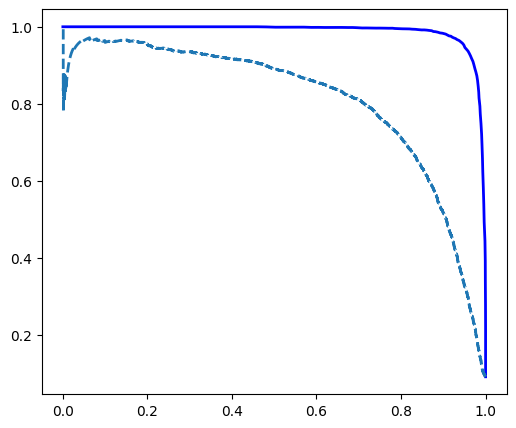

In [ ]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

In [ ]:
idx_for_90_forest_precision = (recalls_forest <= 0.90).argmax()
idx_for_90_forest_precision

np.int64(45)

In [ ]:
threshold_for_90_forest_precision = thresholds_forest[idx_for_90_forest_precision]
threshold_for_90_forest_precision

np.float64(0.45)

In [ ]:
y_train_pred_forest = y_probas_forest[:,1]>= 0.44 # threshold_for_90_forest_precision

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
f1_score(y_train_5,y_train_pred_forest),roc_auc_score(y_train_5,y_train_pred_forest),precision_score(y_train_5,y_train_pred_forest),recall_score(y_train_5,y_train_pred_forest)

(0.9417745803357314,
 np.float64(0.9519059424460229),
 0.9810151878497202,
 0.9055524810920494)

# Trying to OVO manually

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([0, 1, 0, 1, 1, 0])

In [ ]:
X, y = mnist.data, mnist.target.astype(int)


In [ ]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X[:2000], y[:2000], test_size=0.2, random_state=42
)


In [ ]:
digit_pairs = []
for i in range(10):
    for j in range(i+1, 10):
        digit_pairs.append((i, j))

print("Total classifiers:", len(digit_pairs))
digit_pairs

Total classifiers: 45


[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [ ]:
ovo_classifiers = {}

In [ ]:
y_train

array([7, 8, 7, ..., 0, 9, 7])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for a, b in digit_pairs:
    # Filter dataset for only digits a and b
    mask = (y_train == a) | (y_train == b) # gives indexes
    X_pair = X_train[mask]
    y_pair = y_train[mask]

    # Relabel: a -> 0, b -> 1 (binary)
    y_binary = (y_pair == b).astype(int)


    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_pair, y_binary)
    ovo_classifiers[(a, b)] = clf

    print(f"Trained classifier {a} vs {b}")

Trained classifier 0 vs 1
Trained classifier 0 vs 2
Trained classifier 0 vs 3
Trained classifier 0 vs 4
Trained classifier 0 vs 5
Trained classifier 0 vs 6
Trained classifier 0 vs 7
Trained classifier 0 vs 8
Trained classifier 0 vs 9
Trained classifier 1 vs 2
Trained classifier 1 vs 3
Trained classifier 1 vs 4
Trained classifier 1 vs 5
Trained classifier 1 vs 6
Trained classifier 1 vs 7
Trained classifier 1 vs 8
Trained classifier 1 vs 9
Trained classifier 2 vs 3
Trained classifier 2 vs 4
Trained classifier 2 vs 5
Trained classifier 2 vs 6
Trained classifier 2 vs 7
Trained classifier 2 vs 8
Trained classifier 2 vs 9
Trained classifier 3 vs 4
Trained classifier 3 vs 5
Trained classifier 3 vs 6
Trained classifier 3 vs 7
Trained classifier 3 vs 8
Trained classifier 3 vs 9
Trained classifier 4 vs 5
Trained classifier 4 vs 6
Trained classifier 4 vs 7
Trained classifier 4 vs 8
Trained classifier 4 vs 9
Trained classifier 5 vs 6
Trained classifier 5 vs 7
Trained classifier 5 vs 8
Trained clas

In [ ]:
import numpy as np

x = np.array([1,2,3,4,5,2,4,5,3,3,2,6])
y = (x == 2) | (x ==3)
x = x[y]
y = (x == 3).astype(int)
x,y

(array([2, 3, 2, 3, 3, 2]), array([0, 1, 0, 1, 1, 0]))

In [ ]:

X_test[1],np.array([X_test[1]]).shape

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
def ovo_predict_proba(x):
    """
    x: a single test sample, shape (784,)
    returns: predicted digit using OvO probability aggregation
    """
    prob_votes = np.zeros(10)  # one probability sum per digit

    for (a, b), prob_clf in ovo_classifiers.items():
        probs = clf.predict_proba([x])[0]  # shape (2,) → [P(class0), P(class1)]

        # Add probability for digit a (class 0)
        prob_votes[a] += probs[0]
        # Add probability for digit b (class 1)
        prob_votes[b] += probs[1]

    # Choose the digit with highest summed probability
    final_digit = np.argmax(prob_votes)
    return final_digit

In [ ]:
from collections import Counter
correct = 0

for i in range(len(X_test)):
    pred = ovo_predict_proba(X_test[i])
    if pred == y_test[i]:
        correct += 1

    if i % 100 == 0:
        print(f"Progress: {i}/{len(X_test)}")

accuracy = correct / len(X_test)
print("\nOvO SGD Accuracy:", accuracy)

Progress: 0/400
Progress: 100/400
Progress: 200/400
Progress: 300/400

OvO SGD Accuracy: 0.195


In [ ]:
# We will use precesion recall curve to find out best precision recall trade off later at night

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)

In [ ]:
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [ ]:
svm_clf.predict([some_digit])

array([5])

In [ ]:
svm_clf.decision_function([some_digit]).argmax()

np.int64(5)

In [ ]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
svm_clf.estimators_

AttributeError: 'SVC' object has no attribute 'estimators_'

In [ ]:
 X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train_scaled =scaler.fit_transform(X_train.astype(np.float64))

In [ ]:
X_train_scaled[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.02500782, -0.02500782,
       -0.02500782, -0.03269666, -0.03606669, -0.04221881, -0.03489336,
       -0.03511129, -0.02500782, -0.03537629, -0.02739412, -0.03053638,
       -0.02500782,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.02500782, -0.02500782,
       -0.02730232, -0.05076744, -0.06033145, -0.08153329, -0.09

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [ ]:
ovr_clf.predict([some_digit])

array([5])

In [ ]:
ovr_clf.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

# SGD for multiclassification

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mnist.data, mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [ ]:
y_train.shape

(56000,)

In [ ]:
sgd_clf.predict([some_digit])

array([5])

In [ ]:
sgd_clf.decision_function([some_digit]).round()


array([[-26086., -34697.,  -4999.,  -1322., -32247.,   3043., -34494.,
        -14769., -10960.,  -4766.]])

In [ ]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.84212782, 0.87416296, 0.83129755])

In [141]:
# y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3,method="decision_function")

In [145]:
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.91059088, 0.90625167, 0.90147862])